# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:

In [11]:
# Let's listify the contents
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

In [12]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [13]:
# Get the data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
# Create x (features matrix)
x = heart_disease.drop("target", axis=1)

# create y (labels)
y = heart_disease["target"]

In [15]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparamters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [16]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
clf.fit(x_train, y_train);

In [18]:
# make a prediction
y_label = clf.predict(np.array[0, 2, 3, 4])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [19]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2


In [20]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [21]:
y_test

201    0
237    0
187    0
190    0
97     1
      ..
23     1
94     1
145    1
98     1
256    0
Name: target, Length: 61, dtype: int64

In [22]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [23]:
clf.score(x_test, y_test)

0.8524590163934426

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [25]:
confusion_matrix(y_test, y_preds)

array([[23,  4],
       [ 5, 29]], dtype=int64)

In [26]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [27]:
# 5. Improve the model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 72.13%

Trying model with 20 estimators...
Model accuracy on test set: 80.33%

Trying model with 30 estimators...
Model accuracy on test set: 81.97%

Trying model with 40 estimators...
Model accuracy on test set: 81.97%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 86.89%

Trying model with 70 estimators...
Model accuracy on test set: 81.97%

Trying model with 80 estimators...
Model accuracy on test set: 85.25%

Trying model with 90 estimators...
Model accuracy on test set: 86.89%



In [28]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forst_model_1.pkl", "wb"))

In [29]:
loaded_model = pickle.load(open("random_forst_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8688524590163934

In [30]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.9 | packaged by conda-forge | (main, Jan 11 2023, 15:15:40) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\23480\miniconda3\python.exe
   machine: Windows-10-10.0.19045-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 23.0.1
   setuptools: 65.6.3
        numpy: 1.24.2
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: mkl
         prefix: mkl_rt
       filepath: C:\Users\23480\miniconda3\Library\bin\mkl_rt.2.dll
        version: 2023.1-Product
threading_layer: intel
    num_threads: 2

       user_api: openmp
   internal_api: openmp
         prefix: vcomp
       filepath: C:\Users\23480\miniconda3\Lib\site-packages\sklearn\.libs\vcomp140.dll
        version: None
    num_threads: 4

       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: C:\Users\2348

## 1. Getting our data ready to use with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually `x` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [31]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [34]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [36]:
len(heart_disease)

303

### 1.1 Makes sure it's all numerical

In [37]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [38]:
len(car_sales)

1000

In [39]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [40]:
# Split into x/y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2)

In [41]:
#Build machine learning model
# -- This code block will throw an error because all data are 
# -- not numerical

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(x_train, y_train)
# model.score(x_test, y_test)

In [42]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [43]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [44]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [45]:
# Let's refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model.fit(x_train, y_train);

In [46]:
model.score(x_test, y_test)

0.3235867221569877

## 1.2 What if there were missing values

Ways to deal with missing data:

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [47]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [48]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [49]:
# Create X & Y

x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]


In [50]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [51]:
car_sales_missing[:10]

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


### Option 1: Fill missing data with Pandas

In [52]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [53]:
# Fill the Make's column
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [54]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [55]:
# Remove rows with missing price value

In [56]:
car_sales_missing.dropna(inplace=True)

In [57]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [58]:
len(car_sales_missing)

950

In [59]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [60]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing values with Scikit-Learn

In [61]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [62]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [63]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [64]:
# Split into X & Y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

# Check missing values
x.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [69]:
# Fill missing value with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", numerical_imputer, num_features)
])

# Transform the data
# Fill train and test values separately
filled_x_train = imputer.fit_transform(x_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_x_test = imputer.transform(x_test) # tranform takes the imputing missing values from the training set and fills the test set with them

In [70]:
filled_x_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [71]:
filled_x_test

array([['Toyota', 'Blue', 4.0, 99761.0],
       ['Toyota', 'Black', 4.0, 17975.0],
       ['Honda', 'Blue', 4.0, 197664.0],
       ['Nissan', 'Green', 4.0, 235589.0],
       ['Honda', 'Black', 4.0, 231659.0],
       ['Toyota', 'Blue', 4.0, 247601.0],
       ['Toyota', 'Green', 4.0, 110078.0],
       ['missing', 'White', 4.0, 155383.0],
       ['Nissan', 'White', 4.0, 26634.0],
       ['Honda', 'White', 4.0, 130319.03314917127],
       ['Honda', 'Green', 4.0, 238825.0],
       ['Honda', 'Green', 4.0, 37606.0],
       ['Toyota', 'Blue', 4.0, 230908.0],
       ['Toyota', 'Red', 4.0, 159925.0],
       ['Toyota', 'Blue', 4.0, 181466.0],
       ['Toyota', 'Blue', 4.0, 140465.0],
       ['Toyota', 'White', 4.0, 146307.0],
       ['Toyota', 'Green', 4.0, 214179.0],
       ['Honda', 'White', 4.0, 184869.0],
       ['Toyota', 'Black', 4.0, 224986.0],
       ['Nissan', 'White', 3.0, 176135.0],
       ['Nissan', 'Red', 4.0, 130319.03314917127],
       ['Toyota', 'Blue', 4.0, 112223.0],
       ['BM

In [72]:
car_sales_filled = pd.DataFrame(filled_x,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

NameError: name 'filled_x' is not defined

In [73]:
car_sales_filled.isna().sum()

NameError: name 'car_sales_filled' is not defined

In [74]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_x_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_x_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [75]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [76]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [77]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_x_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_x_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [78]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_x_train, y_train)
model.score(transformed_x_test, y_test)

0.21229043336119102

In [79]:
len(car_sales_filled), len(car_sales)

NameError: name 'car_sales_filled' is not defined

## 2. Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

Step 1 - Check the Scikit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking a machine learning model for a regression problem

In [ ]:
# import Buston housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()

In [ ]:
len(housing_df)

In [ ]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

#Create the data 
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

How do we improve this score

What if ridge is not working

Let's refer back to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [80]:
# # Let's try the Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor

# # Setup a random seed
# np.random.seed(42)

# #Create the data 
# X = housing_df.drop("target", axis=1)
# y = housing_df["target"]

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# #Instantiate RandomForestRegressor model
# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)

# # Check the score of the RandomForestRegressor model on test data
# rf.score(X_test, y_test)

### 2.2 Choosing an estimator for a classification problem

Let's go to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [81]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC.

In [83]:
# Import the linearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)


C:\Users\23480\miniconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [84]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [85]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)


0.8524590163934426

In [86]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Tidbit:
    
    1. If you have structured data, use ensumble methods
    2. If you have unstructure data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make prediction

### 3.1 Fitting the model to data

Different names for:
* `X` = features, features variables, data
* `y` = labels, target, target variables

In [87]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier (use the pattern the model has learned)
clf.score(X_test, y_test)


0.8524590163934426

In [88]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [89]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 Make predictions using a machine learning model

2 ways to make predictions:
    1. `predict()`
    2. `predict_proba()`
    

In [90]:
# Use a trained model to make predictions
clf.predict(X) # this doesn't work...

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [91]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [92]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [93]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [94]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [95]:
clf.score(X_test, y_test)

0.8524590163934426

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`


In [97]:
#predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [98]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [99]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [100]:
np.array(y_preds[:10])

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [101]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.14754098360655737

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with `score` method

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis= 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [103]:
clf.score(X_train, y_train)

1.0

In [104]:
clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression...

In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis= 1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor().fit(X_train, y_train);


NameError: name 'housing_df' is not defined

In [106]:
model.score(X_test, y_test)

C:\Users\23480\miniconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 13 features, but RandomForestRegressor is expecting 15 features as input.

### 4.2 Evaluating a model using the `scoring` parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)

model.score(X_test, y_test)

In [ ]:
cross_val_score(clf, X, y )

# cross_val_score(clf, X, y, cv=5)

In [107]:
np.random.seed(42)

#Singletraining and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_crosss_val_score = np.mean(cross_val_score(clf, X, y))

# Compare the two
clf_single_score, clf_crosss_val_score

NameError: name 'cross_val_score' is not defined

In [108]:
# Default scoring parameter of classifier = mean accuracy
clf.score()

TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [109]:
#Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

NameError: name 'cross_val_score' is not defined

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [111]:
np.mean(cross_val_score)

0.8248087431693989

In [112]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Accuracy: 82.48%


**Area under the reciever operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [113]:
# Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make_predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [115]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [116]:
# Calculate fpr, tpr and thresholds

fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

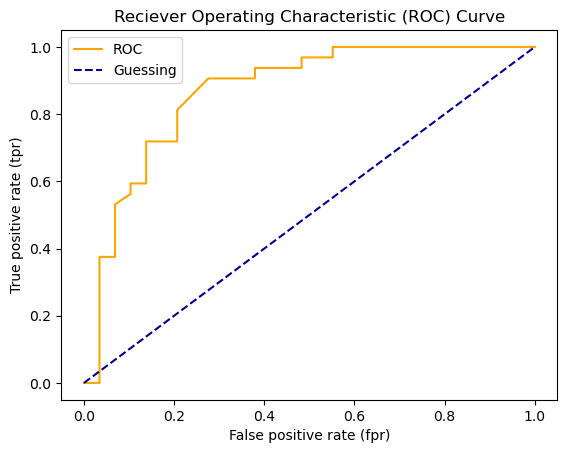

In [117]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr)
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [118]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

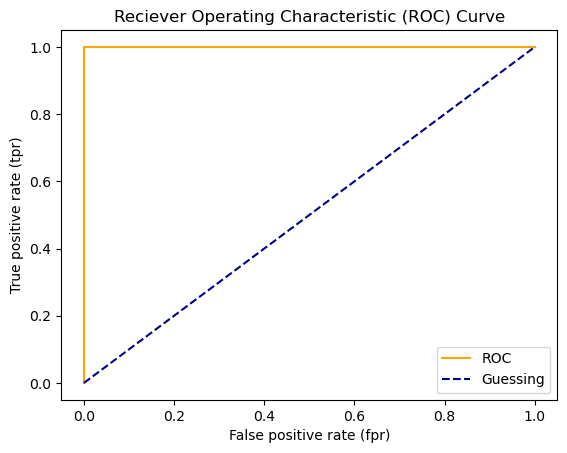

In [119]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)


In [120]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**
A confusion matrix is a quick way to compare the labeles a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused

In [121]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [122]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,23,6
1,6,26


In [123]:
23 + 6 + 26 + 6

61

In [124]:
len(X_test)

61

In [ ]:
# Make our coonfusion matric more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat)

In [ ]:
# --> How to install a conda package into the current environment from a jupyter Notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

In [ ]:
def plot_conf_mat(conf_mat):
        """
        Plots a confusion matrix using Seaborn's heatmap().
        """
        fig, ax = plt.subplots(figsize=(3,3))
        ax = sns.heatmap(conf_mat,
                        annot=True, # Annotate the boxes with conf_mat info
                        cbar=False)
        plt.xlabel("True label")
        plt.ylabel("Predicted label");
        
plot_conf_mat(conf_mat)

**Clasification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

In [ ]:
# Where precision and recall become valuable 
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True, zero_division=True))

### 4.2.2 Regression model
Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

**R^2**

What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);

In [ ]:
model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [ ]:
y_test.mean()

In [ ]:
r2_score(y_test, y_test_mean)

In [ ]:
r2_score(y_test, y_test)

**Mean absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [ ]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds  = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

In [ ]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

**Mean squared error**

In [ ]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

In [ ]:
# Calculate MSE by hand
squared = (np.square(df["differences"]))
squared.mean()

## 4.23 Finnally using the `scoring` parameter


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

In [ ]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

In [ ]:
# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

In [ ]:
#Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

In [ ]:
cv_f1 =cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

How about our regression model?

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2

In [ ]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

In [ ]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

### 4.3 Using different evaluation metrics as Scikit-Learn functions

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

#Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

**Regression evaluation functions

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate teh regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

In [ ]:
what_were_covering

## 5. Improving a model

    First predictions = baseline predictions.
    First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?


From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [ ]:
clf.get_params()

### 5.1 Tuning hyperparameters by hand

 Let's make 3 sets, training, validation and test.

In [ ]:
clf.get_params()

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [ ]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a calssification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into x & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15%
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["sqrt", "log2", None, ],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestCLassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=30, # number of models to try
                           cv=5,
                           verbose=2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

In [ ]:
rs_clf.best_params_

In [ ]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

### 5.3 Hyperparameter tuning with GridSearchCV

In [ ]:
grid_2 = {"n_estimators": [500, 1000, 1200],
        "max_depth": [None],
        "max_features": ["sqrt", None, ],
        "min_samples_split": [6],
        "min_samples_leaf": [1, 2]}

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestCLassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)
# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

In [ ]:
gs_clf.best_params_

In [ ]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Let's compare out different modoels metrics.

In [ ]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
#                                 "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8))

## 6. Saving and loading trained machine learning models 

Two ways to save and load machine learning models:
1. With Phython's `pickle` module
2. With the `joblib` module

** Pickle**

In [ ]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_random_forest_model.pkl", "wb"))

In [ ]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_random_forest_model.pkl", "rb"))

In [ ]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

In [ ]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_random_forest_model.joblib")

In [ ]:
# Import a saved joblib model
loaded_job_model = load(filename="gs_random_random_forest_model.joblib")

In [ ]:
# Import a saved joblib model
loaded_job_model = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, job_y_preds)

## 7. Putting it all together

In [127]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [128]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [129]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we wanr to do (all in one cell):
1. Fill missing data
2. COnvert data to numbers
3. Build a model on the data

In [136]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4)),
    
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to members)
preprocessor = ColumnTransformer(
                transformers=[
                    ("cat", categorical_transformer, categorical_features),
                    ("door", door_transformer, door_feature),
                    ("num", numeric_transformer, numeric_features)
                ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`.

In [ ]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": [1.0],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

In [ ]:
gs_model.score(X_test, y_test)

In [143]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']